In [8]:
import bert_score
bert_score.__version__

'0.3.12'

In [9]:
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["xtick.major.size"] = 0
rcParams["xtick.minor.size"] = 0
rcParams["ytick.major.size"] = 0
rcParams["ytick.minor.size"] = 0

rcParams["axes.labelsize"] = "large"
rcParams["axes.axisbelow"] = True
rcParams["axes.grid"] = True

In [11]:
from bert_score import score

In [12]:
import os

# Gets the user's home directory
home_dir = os.path.expanduser("~")

# Constructs the path to the folder containing the different GPT descriptions for each model
documents_folder = os.path.join("C:\\Users\\User\\OneDrive\\Desktop\\Documents\\Summer Internship\\BERT Score Files\\All GPT Prompt Responses")

# Constructs the full paths to the files
actual_path = os.path.join(documents_folder, "All Actual Descriptions.txt")
control_path = os.path.join(documents_folder, "All Control Responses.txt")

# Opens and reads the files assigning them to an index in a string array separated by two newline characters
def read_file_split_by_blank_lines(file_path):
    with open(file_path) as f:
        content = f.read()
    entries = [entry.strip() for entry in content.split('\n\n') if entry.strip()]
    return entries
refs = read_file_split_by_blank_lines(actual_path)
cands = read_file_split_by_blank_lines(control_path)

In [13]:
print(len(refs))
print(len(cands))

25
25


In [14]:
P, R, F1 = score(cands, refs, lang='en', verbose=True)

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 67.89 seconds, 0.37 sentences/sec


In [15]:
F1
#index 0 is the default GPT-4o score
#index 1 is the fine-tuned GPT-4o score

tensor([0.8934, 0.8641, 0.8721, 0.8889, 0.9180, 0.8909, 0.8931, 0.8974, 0.8924,
        0.8861, 0.8802, 0.8516, 0.8891, 0.8854, 0.8969, 0.8697, 0.8600, 0.8587,
        0.8313, 0.8574, 0.8581, 0.8961, 0.9002, 0.8472, 0.8378])

In [16]:
import torch
print(f"The Control GPT on average was: {100 * torch.mean(F1):.2f} % accurate to the correct description.")

The Control GPT on average was: 87.66 % accurate to the correct description.


In [17]:
import matplotlib.pyplot as plt

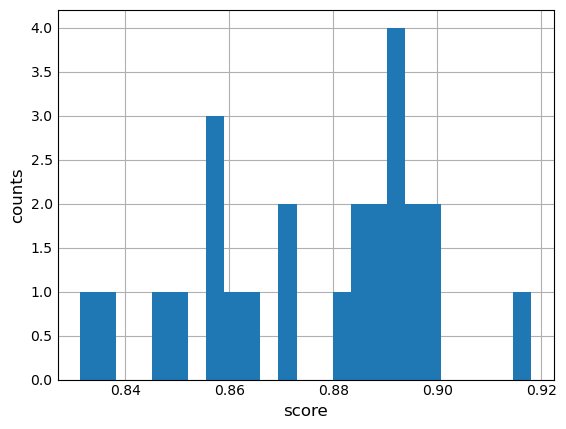

In [18]:
plt.hist(F1, bins=25)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

In [19]:
P_scaled, R_scaled, F1_scaled = score(cands, refs, lang='en', rescale_with_baseline=True)

tensor([0.3683, 0.1947, 0.2425, 0.3420, 0.5141, 0.3537, 0.3668, 0.3921, 0.3624,
        0.3251, 0.2899, 0.1210, 0.3430, 0.3210, 0.3893, 0.2277, 0.1705, 0.1626,
        0.0007, 0.1548, 0.1595, 0.3842, 0.4084, 0.0945, 0.0392])


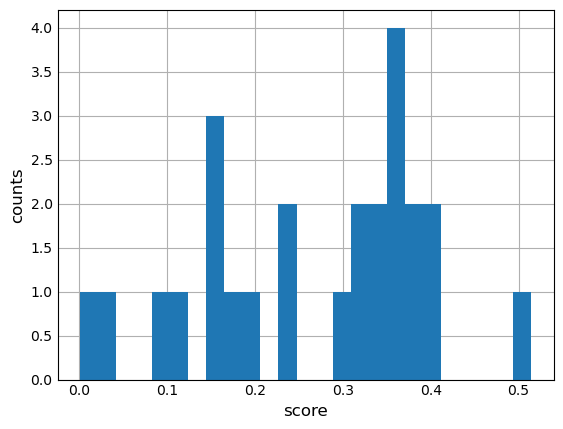

In [20]:
print(F1_scaled)
plt.hist(F1_scaled, bins=25)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

In [21]:
from bert_score import BERTScorer

In [22]:
scorer = BERTScorer(lang="en", rescale_with_baseline=True)

In [23]:
P, R, F1 = scorer.score(cands, refs)

In [24]:
F1

tensor([0.3683, 0.1947, 0.2425, 0.3420, 0.5141, 0.3537, 0.3668, 0.3921, 0.3624,
        0.3251, 0.2899, 0.1210, 0.3430, 0.3210, 0.3893, 0.2277, 0.1705, 0.1626,
        0.0007, 0.1548, 0.1595, 0.3842, 0.4084, 0.0945, 0.0392])

Text(0, 0.5, 'Percent accurate')

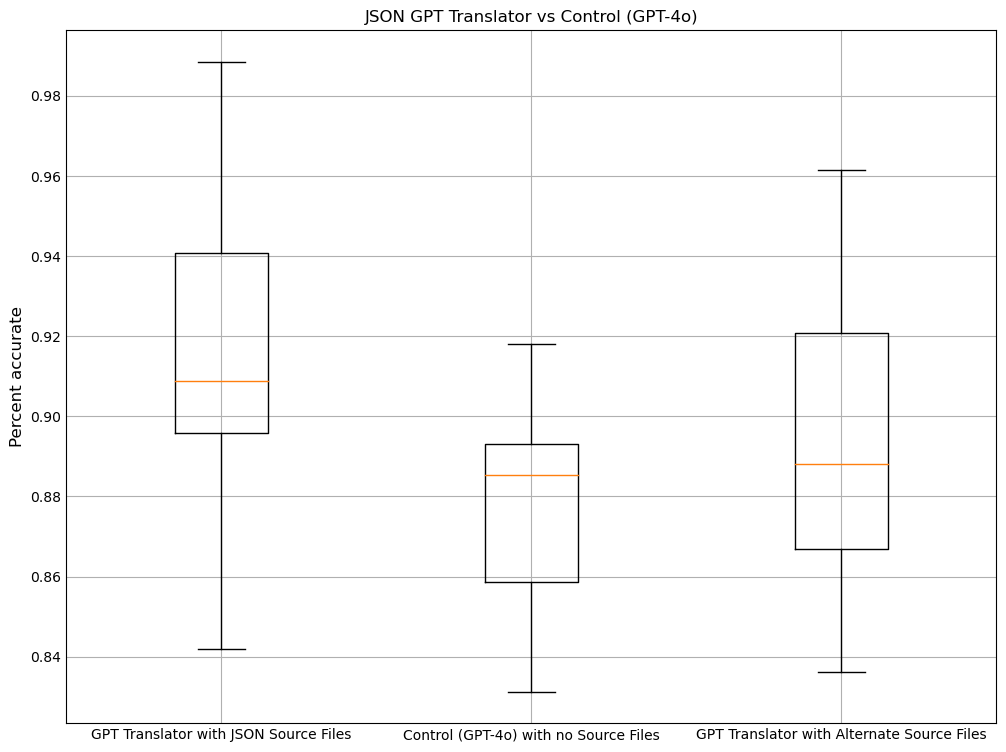

In [25]:
import matplotlib.pyplot as plt
import numpy as np


json_gpt_scores = [0.9110, 0.8965, 0.9092, 0.9531, 0.9407, 0.9435, 0.9237, 0.9537, 0.8957,
        0.9592, 0.9885, 0.8728, 0.9078, 0.9089, 0.9064, 0.9035, 0.9011, 0.9170,
        0.9454, 0.9252, 0.8933, 0.8959, 0.8865, 0.8631, 0.8420]

control_scores = [0.8934, 0.8641, 0.8721, 0.8889, 0.9180, 0.8909, 0.8931, 0.8974, 0.8924,
        0.8861, 0.8802, 0.8516, 0.8891, 0.8854, 0.8969, 0.8697, 0.8600, 0.8587,
        0.8313, 0.8574, 0.8581, 0.8961, 0.9002, 0.8472, 0.8378]

gpt_translator_scores = [0.9401, 0.9153, 0.9207, 0.8880, 0.9445, 0.9450, 0.9248, 0.9615, 0.8929,
        0.9573, 0.8887, 0.8525, 0.8853, 0.8608, 0.8871, 0.8668, 0.8773, 0.8847,
        0.8951, 0.8505, 0.8677, 0.9004, 0.8563, 0.8437, 0.8361]

data = [json_gpt_scores, control_scores, gpt_translator_scores]

plt.figure(figsize=(12,9))
plt.boxplot(data, labels=["GPT Translator with JSON Source Files", "Control (GPT-4o) with no Source Files", "GPT Translator with Alternate Source Files"])
plt.title("JSON GPT Translator vs Control (GPT-4o)")
plt.ylabel("Percent accurate")

In [26]:
import numpy as np
print(f"The GPT Translator with JSON source files has a mean score of {np.mean(json_gpt_scores):.4f}.")
print(f"The Control GPT with no source files has a mean score of {np.mean(control_scores):.4f}.")
print(f"The GPT Translator with alternate source files has a mean score of {np.mean(gpt_translator_scores):.4f}.")

The GPT Translator with JSON source files has a mean score of 0.9137.
The Control GPT with no source files has a mean score of 0.8766.
The GPT Translator with alternate source files has a mean score of 0.8937.


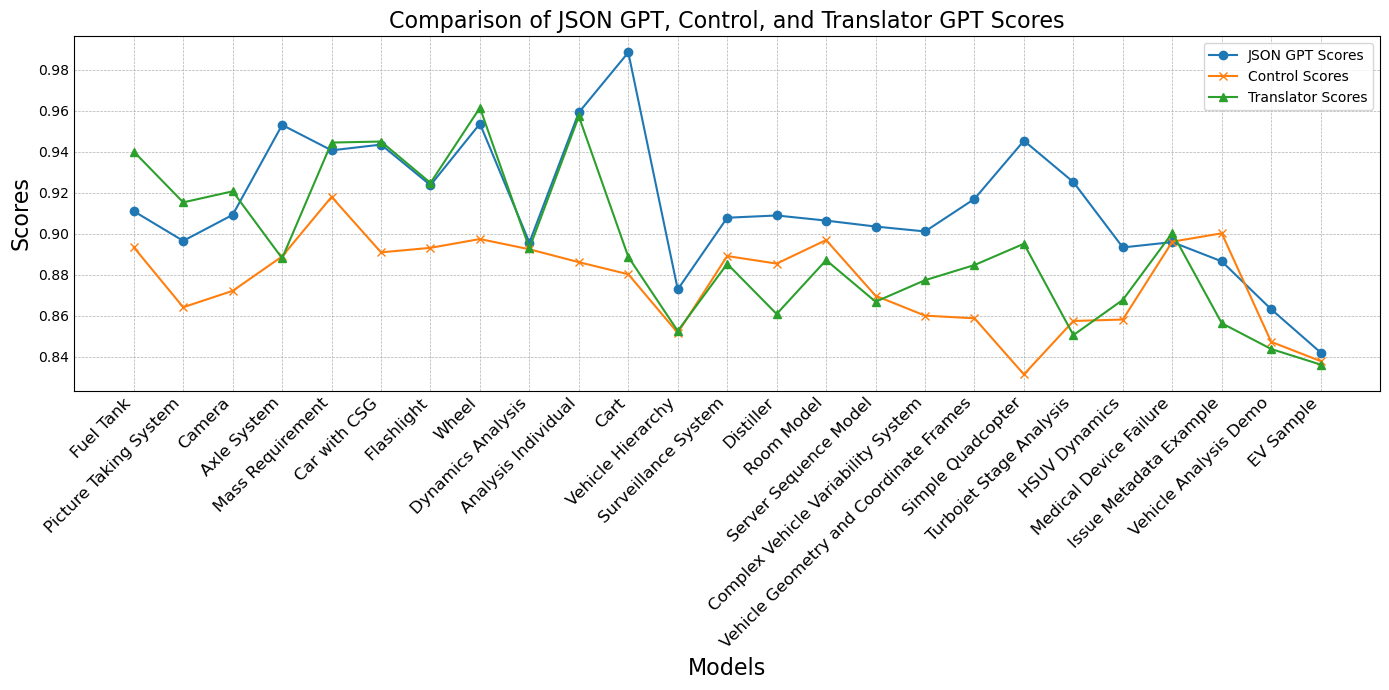

In [27]:
model_names = ['Fuel Tank', 'Picture Taking System', 'Camera', 'Axle System', 'Mass Requirement',
               'Car with CSG', 'Flashlight', 'Wheel', 'Dynamics Analysis', 'Analysis Individual', 
               'Cart', 'Vehicle Hierarchy', 'Surveillance System', 'Distiller', 'Room Model', 
               'Server Sequence Model', 'Complex Vehicle Variability System', 'Vehicle Geometry and Coordinate Frames', 
               'Simple Quadcopter', 'Turbojet Stage Analysis', 'HSUV Dynamics', 'Medical Device Failure', 
               'Issue Metadata Example', 'Vehicle Analysis Demo', 'EV Sample']

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(model_names, json_gpt_scores, label='JSON GPT Scores', marker='o')
ax.plot(model_names, control_scores, label='Control Scores', marker='x')
ax.plot(model_names, gpt_translator_scores, label='Translator Scores', marker='^')

ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Scores', fontsize=16)
ax.set_title('Comparison of JSON GPT, Control, and Translator GPT Scores', fontsize=16)
ax.legend()

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

fig.tight_layout()
plt.show()

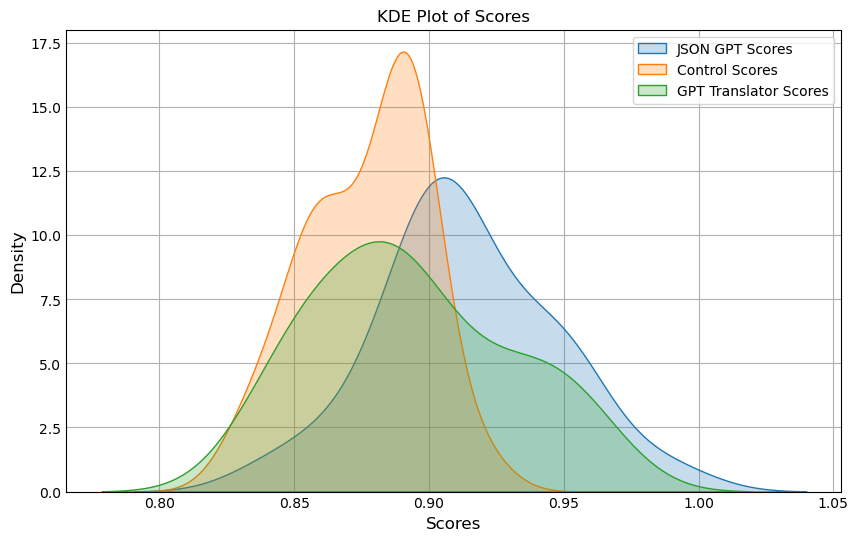

The Kernel Density Plot shows that the JSON GPT Scores are concentrated around 0.91.
The JSON GPT scores are concentrated around higher scores than the other GPTs.
While the GPT Translator has a lower density comparatively, it still outperformed the Control GPT.
This is evident looking at the right side of the GPT Translator's distribition.
Instead of falling like a normal distribution, there is a fair amount of data that brings its average score higher than
the Control GPT's average score despite having the lowest scores by clustered density.


In [28]:
import seaborn as sns

# Plotting the KDE plot
plt.figure(figsize=(10, 6))

sns.kdeplot(json_gpt_scores, fill=True, label='JSON GPT Scores')
sns.kdeplot(control_scores, fill=True, label='Control Scores')
sns.kdeplot(gpt_translator_scores, fill=True, label='GPT Translator Scores')

plt.xlabel('Scores')
plt.ylabel('Density')
plt.title('KDE Plot of Scores')
plt.legend(loc='upper right')

plt.show()
print("The Kernel Density Plot shows that the JSON GPT Scores are concentrated around 0.91.\nThe JSON GPT scores are concentrated around higher scores than the other GPTs.\nWhile the GPT Translator has a lower density comparatively, it still outperformed the Control GPT.\nThis is evident looking at the right side of the GPT Translator's distribition.\nInstead of falling like a normal distribution, there is a fair amount of data that brings its average score higher than\nthe Control GPT's average score despite having the lowest scores by clustered density.")

In [29]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(json_gpt_scores, control_scores)

print(f"JSON GPT vs Control: t-statistic = {t_stat}, p-value = {p_value}\n")


print(f"The p-value of {p_value:.8f} is less than the typical significance level of 0.05 therefore we can reject the null hypothesis\nand conclude that there is a statistically significant difference in accurately translating SysMLv2 models to textual\ndescriptions between a finetuned GPT using JSON source files and an unmodified GPT.\n")


t_stat, p_value = stats.ttest_ind(gpt_translator_scores, control_scores)

print(f"GPT Translator vs Control: t-statistic = {t_stat}, p-value = {p_value}")

print()

print(f"The p-value of {p_value:.8f} essentially matches than the typical significance level of 0.05 therefore we cannot conclude\nwhether not we can reject the null hypothesis, but we can make the statement that the evidence is trending towards\nbeing statistically significant.")

JSON GPT vs Control: t-statistic = 4.717198585581804, p-value = 2.096918071603333e-05

The p-value of 0.00002097 is less than the typical significance level of 0.05 therefore we can reject the null hypothesis
and conclude that there is a statistically significant difference in accurately translating SysMLv2 models to textual
descriptions between a finetuned GPT using JSON source files and an unmodified GPT.

GPT Translator vs Control: t-statistic = 2.0042943503629034, p-value = 0.05069824306663962

The p-value of 0.05069824 essentially matches than the typical significance level of 0.05 therefore we cannot conclude
whether not we can reject the null hypothesis, but we can make the statement that the evidence is trending towards
being statistically significant.
